In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
X_test = np.load("X_samples.npy")
y_test = np.load("y_samples.npy")

In [3]:
fs=X_test.shape[2]
ch=X_test.shape[3]

In [4]:
model = tf.python.keras.models.load_model('model.h5')

18


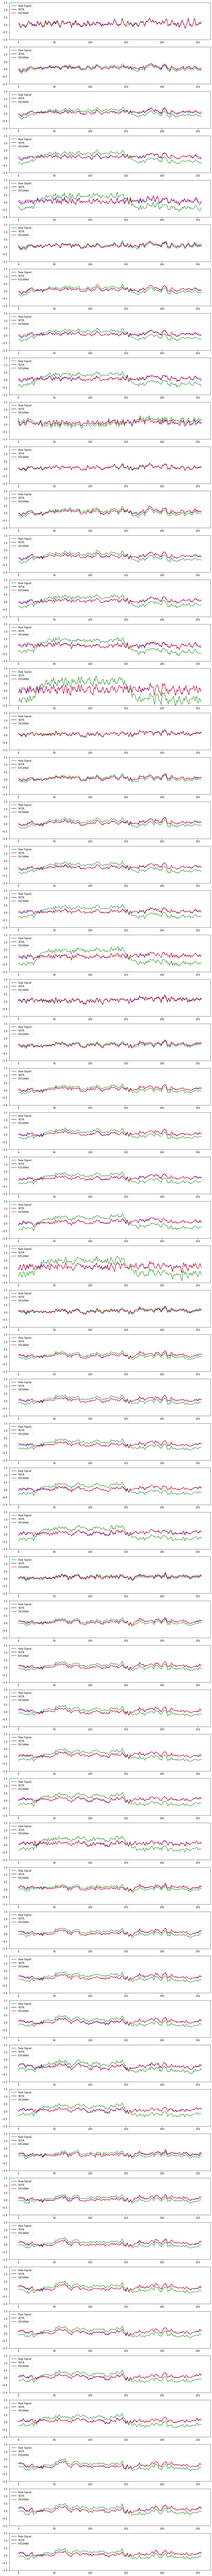

In [5]:
n = np.random.randint(X_test.shape[0])
# n = 0
print(n)

raw=X_test[n:n+1]
gt=y_test[n:n+1]
test=model(raw)
test=test.numpy()
raw=np.swapaxes(raw,1,3)
raw=np.reshape(raw,(ch,fs))
gt=np.swapaxes(gt,1,3)
gt=np.reshape(gt,(ch,fs))
test=np.swapaxes(test,1,3)
test=np.reshape(test,(ch,fs))

plt.figure(figsize=(15,200))
for i in range(0,ch):
    plt.subplot(ch+1,1,i+1)
    plt.ylim(-1, 1.5)
    plt.plot(raw[i],'g', label='Raw Signal')
    plt.plot(gt[i],'b', label='SOTA')
    plt.plot(test[i],'r', label='EEGANet')
    plt.legend(loc="upper left")
    